## 1. Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('nyc_taxi_trip_duration.csv')

Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

In [3]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
#Missing values
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [7]:
# checking the datatype of all features in the dataset
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Categorical variables:**

id, pickup_datetime, dropoff_datetime, store_and_fwd_flag

**Continuous variables:**

vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude

**Target Exploration:** trip_duratation

Here the trip_duration is a continuos variable, which determines that the problem is a regression problem.

understanding categorical variable

In [8]:
#Transforming pick_up and drop_off date time into a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [9]:
#Transforming vendor_id and store_and_fwd to categorical data type
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [10]:
# Converting yes/no flag to 1 and 0 and transforming it into categorical data type
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [11]:
#Checking the data types again
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [12]:
df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

In [13]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


The trip duration data is collected from the time period of first 6 months from the year 2016

In [14]:
# extracting more features from the datetime variable
# For pick_up
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
# for Drop_off
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,17,6,2,17,6,2


### Univariate Visualization

Text(0, 0.5, 'Total Number of pickups')

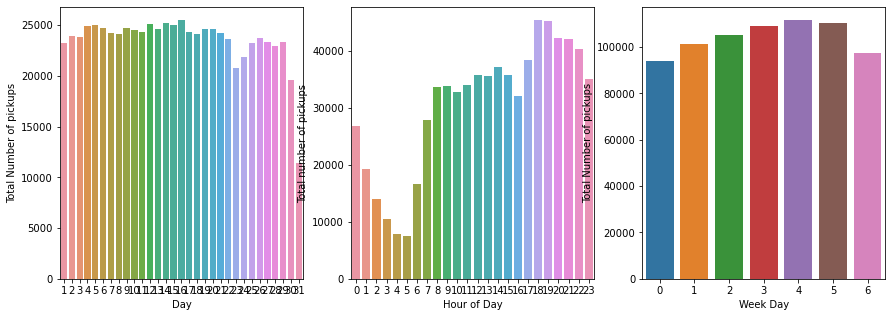

In [16]:
# Datetime features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count
plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

* Trips are very low in early morning, while very high in the late evening hour in the day.
* Trip is on peak on Thursday(4).
* Trips are very low in early morning, while very high in the late evening hour in the day.

Text(0, 0.5, 'Frequency')

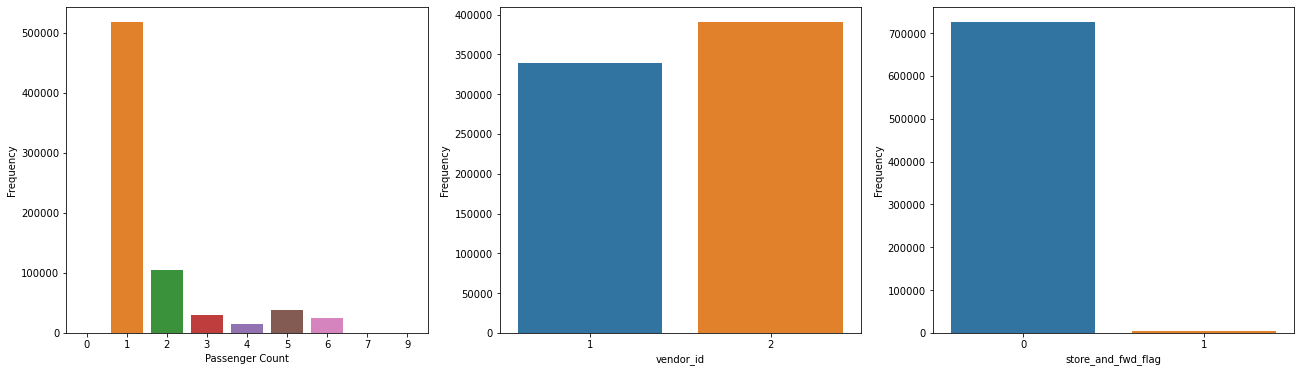

In [17]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

* Most of the trips involve only 1 passenger.
* Vendor 2 has more trips, compared to vendor 1.
* The value with 1 is very low in the store_and_fwd_flag variable. This suggests that almost no storing took place.

**Feature engineering for passenger_count**

In [18]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

Here as we can see that 0 and 9 are very less in number so we will remove it.

In [19]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [20]:
# checking
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [21]:
#Getting the summary of the trip_duration dataset
df['trip_duration'].describe()/3600 # Trip duration in hours

count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

There is a trip with maximum duration of 538 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform this feature.

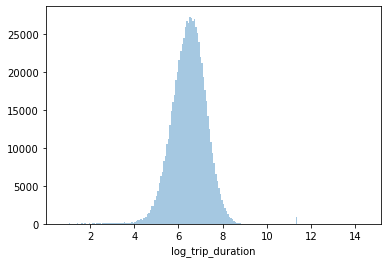

In [22]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

We find:

1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,29,16,0,29,16,0,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,11,23,4,11,23,4,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,21,17,6,21,18,6,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,5,9,1,5,10,1,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,17,6,2,17,6,2,6.744059


In [24]:
df.shape

(729287, 19)

### Lattitude & Longitude
Lets look at the geospatial or location features to check consistency. They should not vary much as we are only considering trips within New York city.

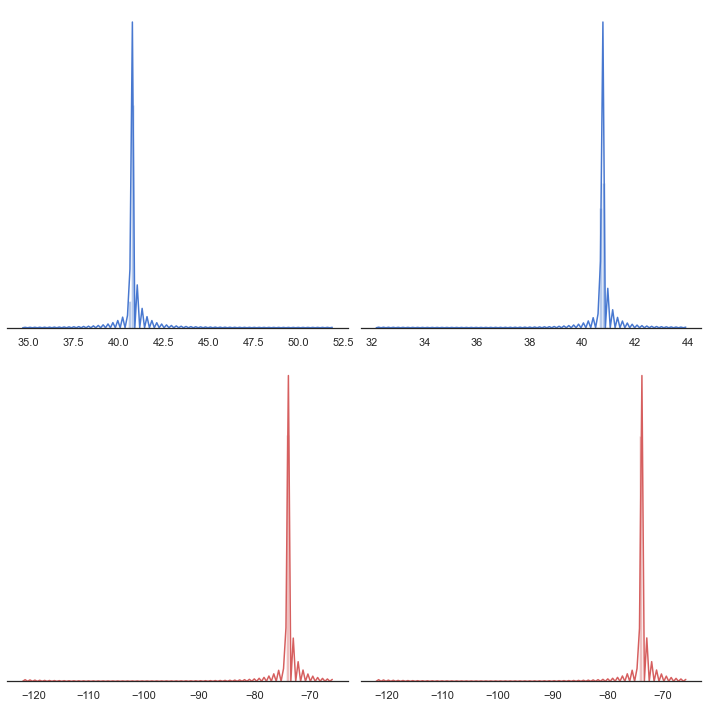

In [25]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73. 
2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
3. A good idea is to remove these outliers and look at the distribution more closely

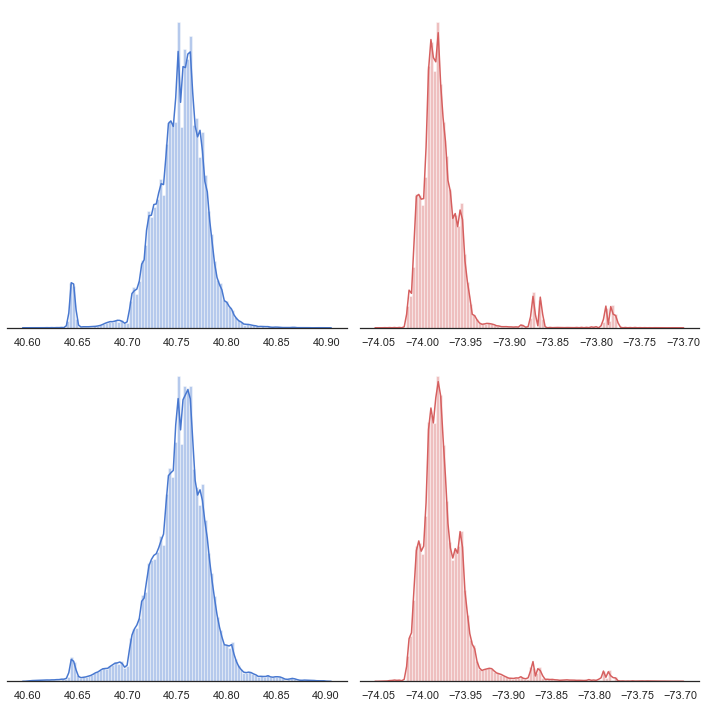

In [26]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms


### Bivariate Relations with Target

In [27]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'pickup_day', 'pickup_hour',
       'pickup_weekday', 'dropoff_day', 'dropoff_hour', 'dropoff_weekday',
       'log_trip_duration'],
      dtype='object')

### Trip Duration vs Vendor Id

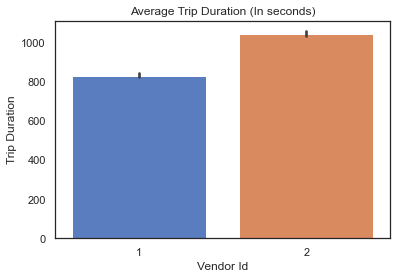

In [28]:
sns.barplot(x="vendor_id", y="trip_duration",data=df);
plt.title("Average Trip Duration (In seconds)");
plt.xlabel("Vendor Id");
plt.ylabel("Trip Duration");

* The average trip duration of vendor 2 is greater than vendor 1

### Correlation Heatmap

Let us quickly look at the correlation heatmap to check the correlations amongst all features.

In [29]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude',
                       'dropoff_longitude','dropoff_latitude','trip_duration'])

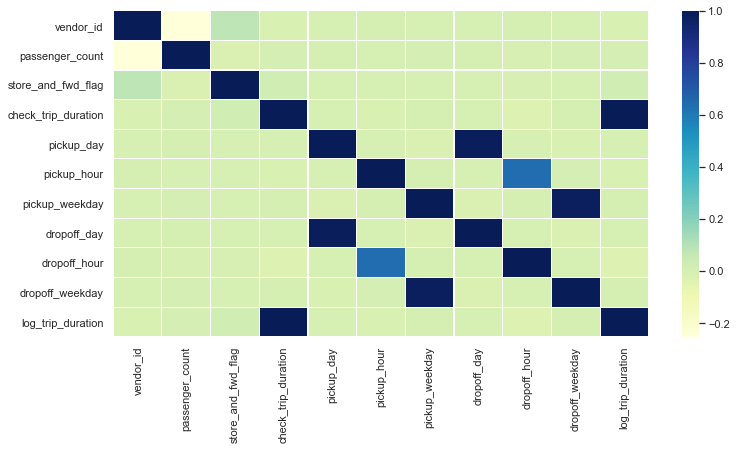

In [30]:
# checking the correlation among all features
plt.figure(figsize=(12, 6))
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
#corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## Basic Predictive Modeling

As we know that this is a regression problem then we have to predict discrete value, which is our target- trip_duration.

**So the evalutation metric for this model is - Root Mean Squared Error(RMSE)**

RMSE is a very simple metric to be used for evaluation. Since, we will be comparing our models and we will create a benchmark model as a baseline, RMSE will easy to compare these different models. Lower, the value of RMSE, better the model. It will help in getting the elbow curve.

## Benchmark model

**Segregating variables: Independent and Dependent Variables**

In [31]:
#seperating independent and dependent variables
X = df1.drop('log_trip_duration', axis=1)
y = df1['log_trip_duration']

**Scaling the data (Using MinMax Scaler)**

In [32]:
#Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
# creating train and test out of dataset for benchmark model
train = pd.concat([X_train, y_train], axis=1, join="inner")
test = pd.concat([X_test, y_test], axis=1, join="inner")

In [35]:
train.head()

,vendor_id,passenger_count,store_and_fwd_flag,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
515261,0.0,0.0,0.0,0.000792,0.266667,0.478261,0.333333,0.266667,0.478261,0.333333,6.470800
564538,1.0,0.0,0.0,0.000720,0.700000,0.521739,0.166667,0.700000,0.565217,0.166667,6.911747
449767,1.0,0.0,0.0,0.000669,0.433333,0.956522,0.833333,0.433333,0.956522,0.833333,7.177019
554996,1.0,0.0,0.0,0.000032,0.433333,0.347826,0.500000,0.433333,0.347826,0.500000,5.556828
403942,0.0,0.0,1.0,0.001076,0.900000,0.521739,0.500000,0.900000,0.565217,0.500000,7.293698


In [36]:
test.head()

,vendor_id,passenger_count,store_and_fwd_flag,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
715403,1.0,0.0,0.0,0.000372,0.333333,0.608696,0.833333,0.333333,0.652174,0.833333,6.692084
662439,0.0,0.0,0.0,0.000469,0.866667,0.826087,0.833333,0.866667,0.869565,0.833333,5.713733
631617,0.0,0.0,0.0,0.000041,0.833333,0.478261,0.833333,0.833333,0.478261,0.833333,6.437752
383387,1.0,0.0,0.0,0.000777,0.833333,0.391304,0.166667,0.833333,0.434783,0.166667,5.902633
429837,1.0,0.0,0.0,0.000588,0.633333,0.826087,0.333333,0.633333,0.826087,0.333333,6.761573


In [37]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['log_trip_duration'].mean()

In [38]:
#importing the library
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

#calculating root mean squared error
error = sqrt(MSE(test['log_trip_duration'] , test['simple_mean']))
error

0.7871127279815822

In [39]:
trip_store = pd.pivot_table(train, values='log_trip_duration', index =['store_and_fwd_flag'], aggfunc=np.mean)
trip_store

,log_trip_duration
store_and_fwd_flag,
0.0,6.462442
1.0,6.464510


In [40]:
# initializing new column to zero
test['trip_store_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['trip_store_mean'][test['store_and_fwd_flag'] == i] = train['log_trip_duration'][train['store_and_fwd_flag'] == i].mean()

In [41]:
#calculating root mean squared error
error = sqrt(MSE(test['log_trip_duration'] , test['trip_store_mean']))
error

0.7871117102087578

As after the Calculation, The Error value as : **0.7871** for our **Benchmark Model**

## KNN Model

In [ ]:
# Creating instance of KNN
knn = KNN(n_neighbors=5)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting over the Train Set and calculating RMSE
y_pred = knn.predict(X_test)

error = sqrt(MSE(y_test, y_pred))

print("Test RMSE: ", error)

**Elbow curve to determine the best value of k**

In [49]:
def Elbow(k):
  test = []
#training model for evey value of K
  for i in k:
    #Instance of KNN
    reg = KNN(n_neighbors=i)
    reg.fit(X_train, y_train)
    #Appending RMSE value to empty list claculated using the predictions
    tmp_pred = reg.predict(X_test)
    temp_error = sqrt(MSE(tmp_pred, y_test))
    test.append(temp_error)

  return test

In [50]:
#Defining K range
k = range(1, 10)

In [ ]:
# calling above defined function
test = Elbow(k)

In [ ]:
# plotting the curve
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')

Test Score

In [ ]:
# Creating instance of KNN again at the value of n_neighbours=6
knn = KNN(n_neighbors=4)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting over the Test Set and calculating RMSE
y_pred = knn.predict(X_test)

error = sqrt(MSE(y_test, y_pred))

print("Test RMSE: ", error)

Train Score

In [ ]:
# Predicting over the Train Set and calculating RMSE
y_pred = knn.predict(X_train)

knn_train_rmse = sqrt(MSE(y_train, y_pred))

print("Train RMSE: ", knn_train_rmse)

## Linear Model

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Test Score**

In [43]:
y_pred = lr.predict(X_test)

lm_test_rmse = sqrt(MSE(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.7345971909495087


**Train Score**

In [44]:
y_pred = lr.predict(X_train)

lm_train_rmse = sqrt(MSE(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.749042155992732


## Decision tree model

In [45]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Test Score**

In [46]:
y_pred = dtr.predict(X_test)

dtr_test_rmse = sqrt(MSE(y_test, y_pred))
print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.0004080035098783167


In [47]:
y_pred = dtr.predict(X_train)

dtr_train_rmse = sqrt(MSE(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  2.911523031894004e-14


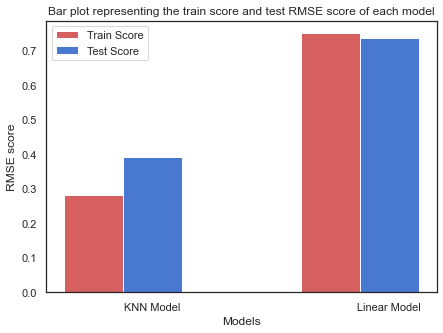

In [48]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[7, 5])

train_scores = [0.2809, 0.7490 ]
test_scores = [0.3913, 0.7345]

# Passing the parameters to the bar function
# Using X now to align the bars side by side
X = np.arange(len(train_scores))


# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Train Score', 'Test Score'])

labels = ['KNN Model', 'Linear Model']

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(2)], labels)

# Giving the tilte for the plot
plt.title("Bar plot representing the train score and test RMSE score of each model")
# Namimg the x and y axis
plt.xlabel('Models')
plt.ylabel('RMSE score')


# Displaying the bar plot
plt.show()